Project 3 - Neil Amin
======

### QUESTIONS

1) After watching the movie Titanic, it was understood that mostly women and children and survived. Were more young people actually spared over old people?

2) I think it would be interesting to see the breakdown of how many people survived in each class level. The rich are usually prioritized over the poor.

3) Another interesting piece would be to find out the gender breakdown of the survivors.

### Data Wrangling

After loading the data into a dataframe, I displayed and made adjustments that I felt were going to be useful for my data analysis. 

1) I changed the data type of survived to boolean because I knew that I wanted to do a lot of comparisions between the survivors and those who died so I thought a boolean data type would work better for my needs

2) I deleted columns that I felt were not going to be useful to my data analysis and that would just add clutter to my data.

3) I deleted all rows that had any null values in them.

4) I split the surviors and those who died into their own dataframes because I felt that that would make it quicker for to perform useful calculations of each.

In [56]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
df = pd.read_csv('titanic-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
#check the default data types of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [59]:
#cast survived as boolean type instead of int
df['Survived']=df['Survived'].astype('bool')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
#delete columns not useful for my data analysis
df = df.drop('Name', 1)
df = df.drop('SibSp', 1)
df = df.drop('Parch', 1)
df = df.drop('Ticket', 1)
df = df.drop('Fare', 1)
df = df.drop('Cabin', 1)
df = df.drop('Embarked', 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,False,3,male,22.0
1,2,True,1,female,38.0
2,3,True,3,female,26.0
3,4,True,1,female,35.0
4,5,False,3,male,35.0


In [61]:
#count rows with any null values
df.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
dtype: int64

In [62]:
#drop rows with any null value
df = df.dropna(how='any')
df.isnull().count()

PassengerId    714
Survived       714
Pclass         714
Sex            714
Age            714
dtype: int64

In [63]:
#See general stats of the passengers
df.describe()

,PassengerId,Pclass,Age
count,714.000000,714.000000,714.000000
mean,448.582633,2.236695,29.699118
std,259.119524,0.838250,14.526497
min,1.000000,1.000000,0.420000
25%,222.250000,1.000000,20.125000
50%,445.000000,2.000000,28.000000
75%,677.750000,3.000000,38.000000
max,891.000000,3.000000,80.000000


In [64]:
#move all of the survivors into seperate dataframe
survivors = df.copy()
survivors = df[survivors.Survived==True]
survivors.head()

,PassengerId,Survived,Pclass,Sex,Age
1,2,True,1,female,38.0
2,3,True,3,female,26.0
3,4,True,1,female,35.0
8,9,True,3,female,27.0
9,10,True,2,female,14.0


In [65]:
#delete the survivors from the original data frame
df = df[df.Survived==False]
df.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,False,3,male,22.0
4,5,False,3,male,35.0
6,7,False,1,male,54.0
7,8,False,3,male,2.0
12,13,False,3,male,20.0


### Exploratory Data Analysis

1) After splitting up the data into 2 different dataframes, I performed describe() on both to get a general look at some statistics about the Age and Pclass of both groups of people.

2) I decided from there to plot a histogram of the various age of surviors so that I could visualize the ages of the survivors.

3) I made a pie chart to compare the Pclass of the survivors vs dead which was a great visualization of the difference in wealth of both

4) Finally I made a bar graph of the number of male vs female surviors.

In [66]:
#get general description of the survivor's data
survivors.describe()

,PassengerId,Pclass,Age
count,290.000000,290.000000,290.000000
mean,457.768966,1.872414,28.343690
std,250.845515,0.836617,14.950952
min,2.000000,1.000000,0.420000
25%,260.500000,1.000000,19.000000
50%,452.000000,2.000000,28.000000
75%,669.500000,3.000000,36.000000
max,890.000000,3.000000,80.000000


In [67]:
#get general descriptipon of the dead's data
df.describe()

,PassengerId,Pclass,Age
count,424.000000,424.000000,424.000000
mean,442.299528,2.485849,30.626179
std,264.739548,0.743633,14.172110
min,1.000000,1.000000,1.000000
25%,200.750000,2.000000,21.000000
50%,436.000000,3.000000,28.000000
75%,683.250000,3.000000,39.000000
max,891.000000,3.000000,74.000000


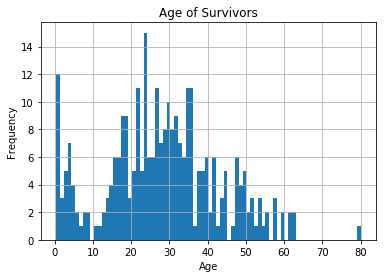

In [68]:
#Plot a histogram of the ages of each survivor
hist_plot = survivors['Age'].hist(bins=80)
hist_plot.set_title('Age of Survivors')
hist_plot.set_xlabel('Age')
hist_plot.set_ylabel('Frequency')

In [69]:
#Average class of Survivors vs Dead
print (survivors.Pclass.mean())
print (df.Pclass.mean())

1.8724137931034484
2.4858490566037736


In [70]:
#Sum of each cavin class of the survivors
class_count = survivors.groupby('Pclass').count()
print (class_count['Survived'])

Pclass
1    122
2     83
3     85
Name: Survived, dtype: int64


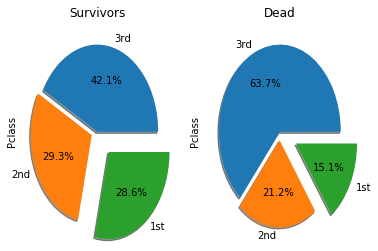

In [71]:
#Take a look at a pie chart of the Pclass of 
# Survivors vs Dead

fig, axs = plt.subplots(1,2)

survivors['Pclass'].value_counts().plot(shadow=True, title='Survivors', kind='pie', autopct = '%1.1f%%', labels=['3rd', '2nd', '1st'], explode=[0, 0.1, 0.3], ax=axs[0])
df['Pclass'].value_counts().plot(shadow=True, title='Dead', kind='pie', autopct = '%1.1f%%', labels=['3rd', '2nd', '1st'], explode=[0, 0.1, 0.3], ax=axs[1])

In [72]:
#Percentage of Male vs Female Survivors
gender_count = ((survivors.groupby('Sex').count())/(survivors.count()))*100
print (gender_count['Survived'])

Sex
female    67.931034
male      32.068966
Name: Survived, dtype: float64


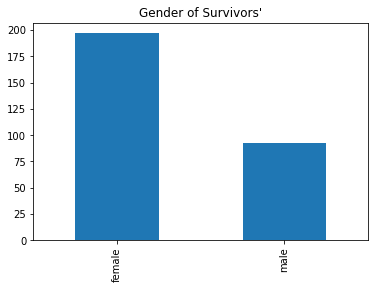

In [73]:
#Create a breakdown of Male vs Female Survivors
survivors['Sex'].value_counts().plot(kind='bar', title='Gender of Survivors\'')

### Conclusions

##### The following is my conclusions about the questions I wrote:

1) It turns out that the average age of the survivors was actually only a little over 1 year older than the average age of the entire ship and only a little over 2 years older than those that did not survive. These numbers seem to indicate that children were not prioritized.

2) When we compare the average passenger class of those who survived vs died and look at pie charts of each, we can clearly see that the people who survived generally were in a higher class then those who died.

3) Finally when we looked the number of survivors who were male vs the number of surviors who were female, we can clearly see that the major of survivors were female.

##### Data Limitiations

I feel that the data was probably limited because it was only a sample of the data which means there could have been bias present since the sampling method is not given